hipotesis y correlación, se enmarcan en el proceso inferencial
mecanismo para aprender sobre los datos cuando hay info incompleta, se profundará sobre los graficos con la libreria seaborn para graficos estándar

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import lec4_graphs as gfx

df = pd.read_csv('qog_std_cs_jan18.csv')

plt.style.use('seaborn') #Estilo por defecto, buscar google mathplotlib style plot
plt.rcParams['figure.figsize'] = (8,6) #parametros que controlan todos los gráficos

In [51]:
import seaborn as sns

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

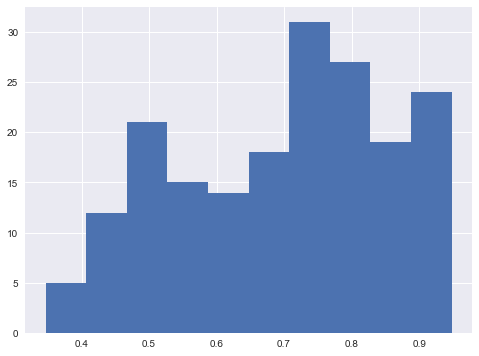

In [3]:
plt.hist(df['undp_hdi'].dropna())

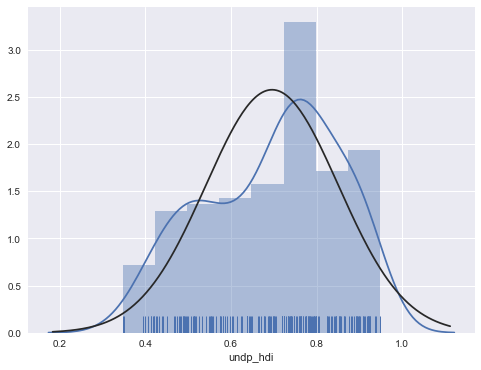

In [4]:
sns.distplot(df['undp_hdi'].dropna(), rug = True, fit = stats.stats.norm)
#rug muestra cada una de las observaciones

## Gráfico de Barras

In [53]:
df['region_recod'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10], ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

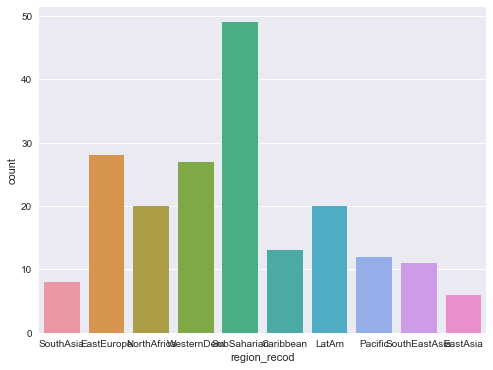

In [6]:
sns.countplot(df['region_recod'])

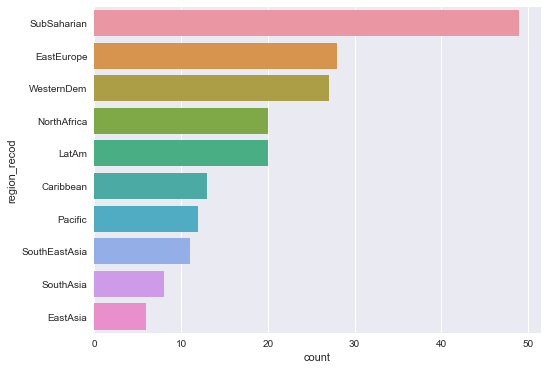

In [7]:
sns.countplot(y = df['region_recod'], order = df['region_recod'].value_counts().index)

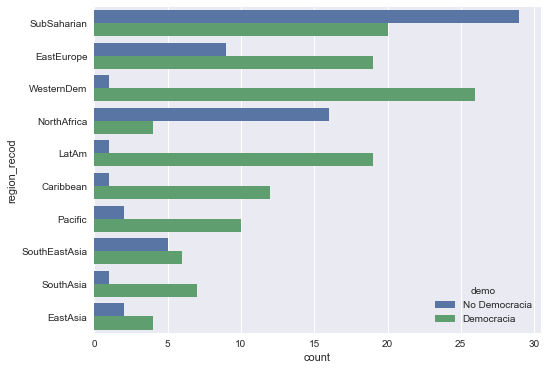

In [8]:
df['demo'] = np.where(df['gol_inst'] <=2, 'Democracia', 'No Democracia')

sns.countplot(y=df['region_recod'], hue= df['demo'], order = df['region_recod'].value_counts().index)

C:\Users\const\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\const\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


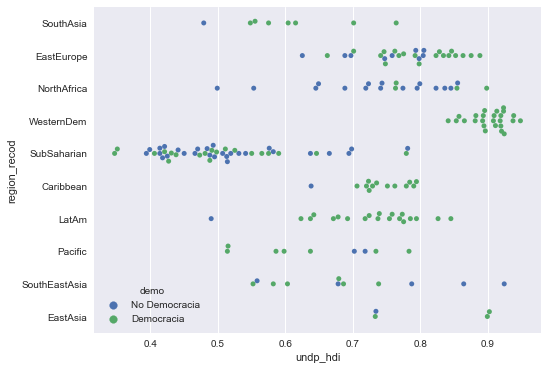

In [9]:
sns.swarmplot(y=df['region_recod'], x=df['undp_hdi'],
             hue=df['demo'])

## FacetGrid

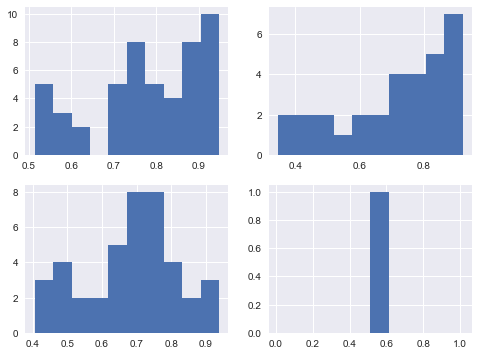

In [10]:
#subset 
gol_0 = df[df['gol_inst']== 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst']== 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst']== 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst']== 4.0]['undp_hdi'].dropna()

#generamos dos iterables con enumerate
for i, j in enumerate([gol_0, gol_1, gol_2, gol_4]):
    plt.subplot(2,2,i+1)
    plt.hist(j)

C:\Users\const\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


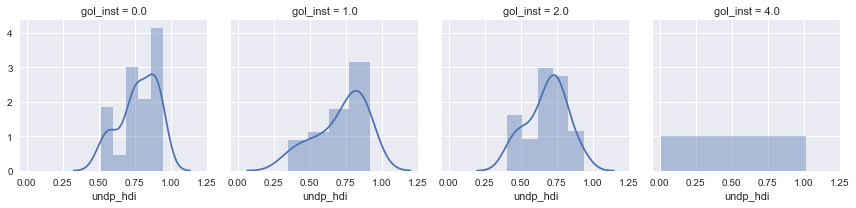

In [11]:
grid = sns.FacetGrid(df, col ='gol_inst', col_wrap = 4)
grid = grid.map(sns.distplot, 'undp_hdi')

In [12]:
df['gol_inst'].value_counts()

0.0    54
2.0    41
1.0    32
4.0     2
Name: gol_inst, dtype: int64

## Scatterplot - Diagrama de dispersión

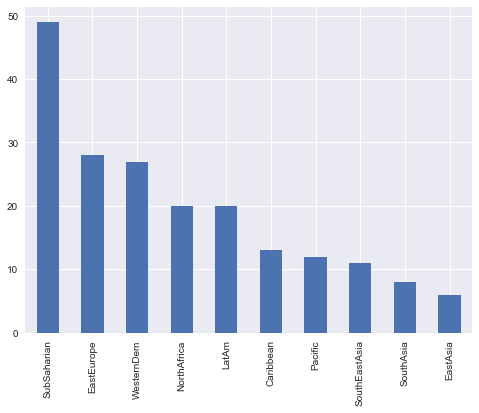

In [13]:
#Otro ejercicio
df['region_recod'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Calidad de gobierno en gunción a IDH')

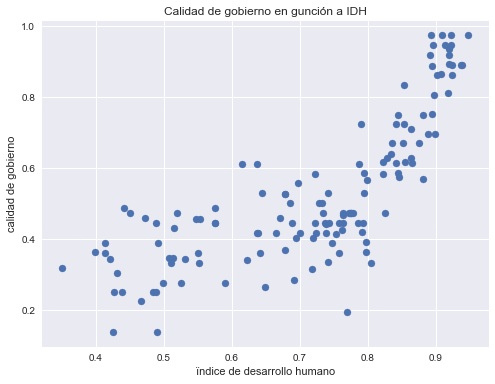

In [14]:
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.xlabel('ïndice de desarrollo humano')
plt.ylabel('calidad de gobierno')
plt.title('Calidad de gobierno en gunción a IDH')

In [15]:
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()

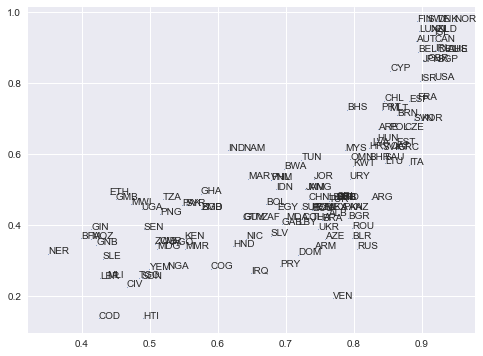

In [16]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker= '.', s=1)
for i in scatter_data.index:
    ax.text(scatter_data.loc[i,'undp_hdi'],
           scatter_data.loc[i, 'icrg_qog'],
           str(scatter_data.loc[i, 'ccodealp']))

### Agregar una recta de tendencia

In [17]:
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'],
                                  scatter_data['icrg_qog'],
                                  1)

In [18]:
print(pendiente)

1.0077917998503934


In [19]:
intercepto

-0.1954107728917399

In [20]:
linear_fit = [pendiente*j + intercepto for j in scatter_data['undp_hdi']]

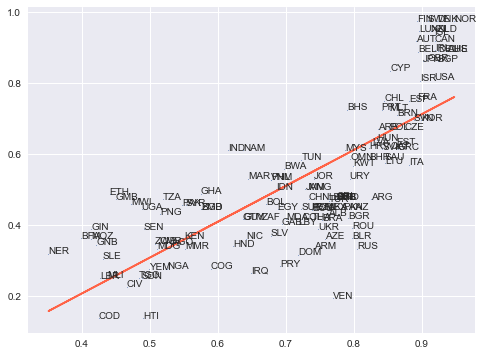

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker= '.', s=1)
ax.plot(scatter_data['undp_hdi'], linear_fit, color ='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i,'undp_hdi'],
           scatter_data.loc[i, 'icrg_qog'],
           str(scatter_data.loc[i, 'ccodealp']))

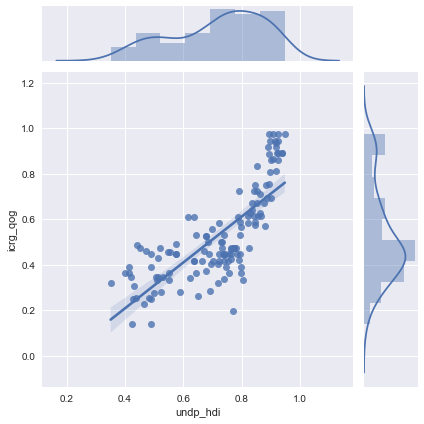

In [22]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind = 'reg')

# Correlación
- Correlación y covarianza don piedras angulares para metodos mas sofisticados 
- Correlación no implica causalidad

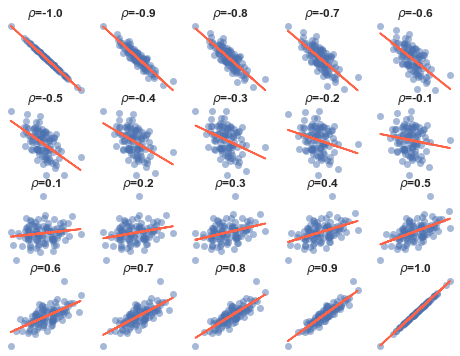

In [23]:
gfx.generate_corr_matrix()

In [24]:
#Obtengo una correlación en un 76%
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

### Forma de visualizar correlación

In [25]:
wvs_subset = df.filter(regex='wvs_conf*').dropna()
wvs_subset.corr()

,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,wvs_confpp,wvs_confpr,wvs_conftv,wvs_confun
wvs_confaf,1.000000,0.331289,0.632955,0.191708,0.539076,0.603475,0.429213,0.461554,0.495793,0.433317,0.380856,0.393870,0.253356
wvs_confch,0.331289,1.000000,0.128526,0.123436,0.098111,0.021361,0.145398,0.008904,-0.206500,0.071517,0.238694,0.298447,0.010541
wvs_confcs,0.632955,0.128526,1.000000,0.518017,0.771648,0.795691,0.872042,0.847592,0.593276,0.809296,0.733149,0.723421,0.595613
wvs_confenv,0.191708,0.123436,0.518017,1.000000,0.526552,0.415506,0.601539,0.594918,0.323091,0.584604,0.653851,0.578776,0.778747
wvs_confgov,0.539076,0.098111,0.771648,0.526552,1.000000,0.691203,0.741203,0.902106,0.526431,0.866313,0.723991,0.721074,0.514832
wvs_confjs,0.603475,0.021361,0.795691,0.415506,0.691203,1.000000,0.721389,0.693953,0.806605,0.606416,0.539229,0.545928,0.306461
wvs_conflu,0.429213,0.145398,0.872042,0.601539,0.741203,0.721389,1.000000,0.824853,0.497486,0.821691,0.847822,0.851007,0.610956
wvs_confpar,0.461554,0.008904,0.847592,0.594918,0.902106,0.693953,0.824853,1.000000,0.503028,0.963128,0.809282,0.789024,0.687792
wvs_confpol,0.495793,-0.206500,0.593276,0.323091,0.526431,0.806605,0.497486,0.503028,1.000000,0.379890,0.315123,0.304618,0.211052
wvs_confpp,0.433317,0.071517,0.809296,0.584604,0.866313,0.606416,0.821691,0.963128,0.379890,1.000000,0.816111,0.787537,0.716244


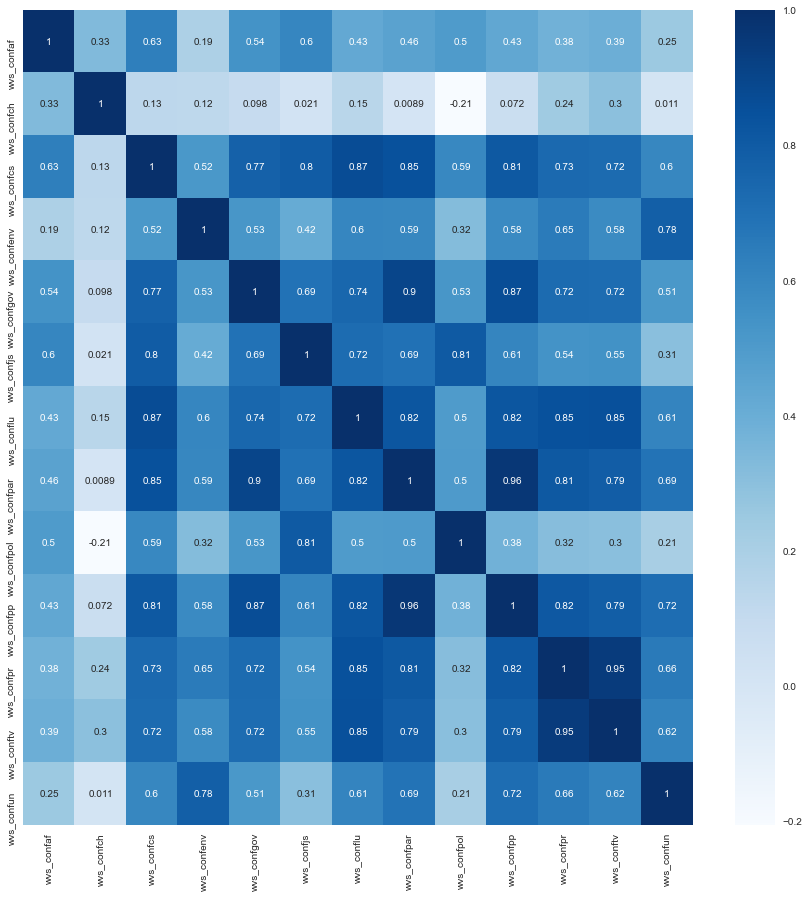

In [26]:
plt.figure(figsize = (15,15))
sns.heatmap(wvs_subset.corr(), cmap = 'Blues', annot=True )

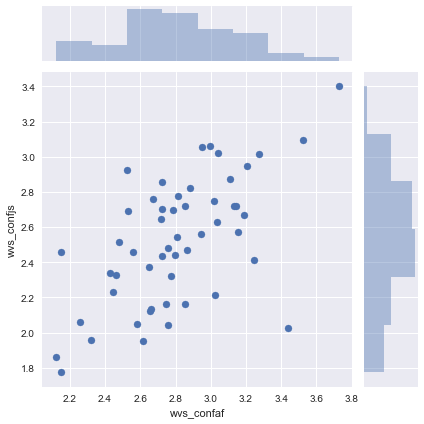

In [27]:
sns.jointplot(wvs_subset['wvs_confaf'],wvs_subset['wvs_confjs'])

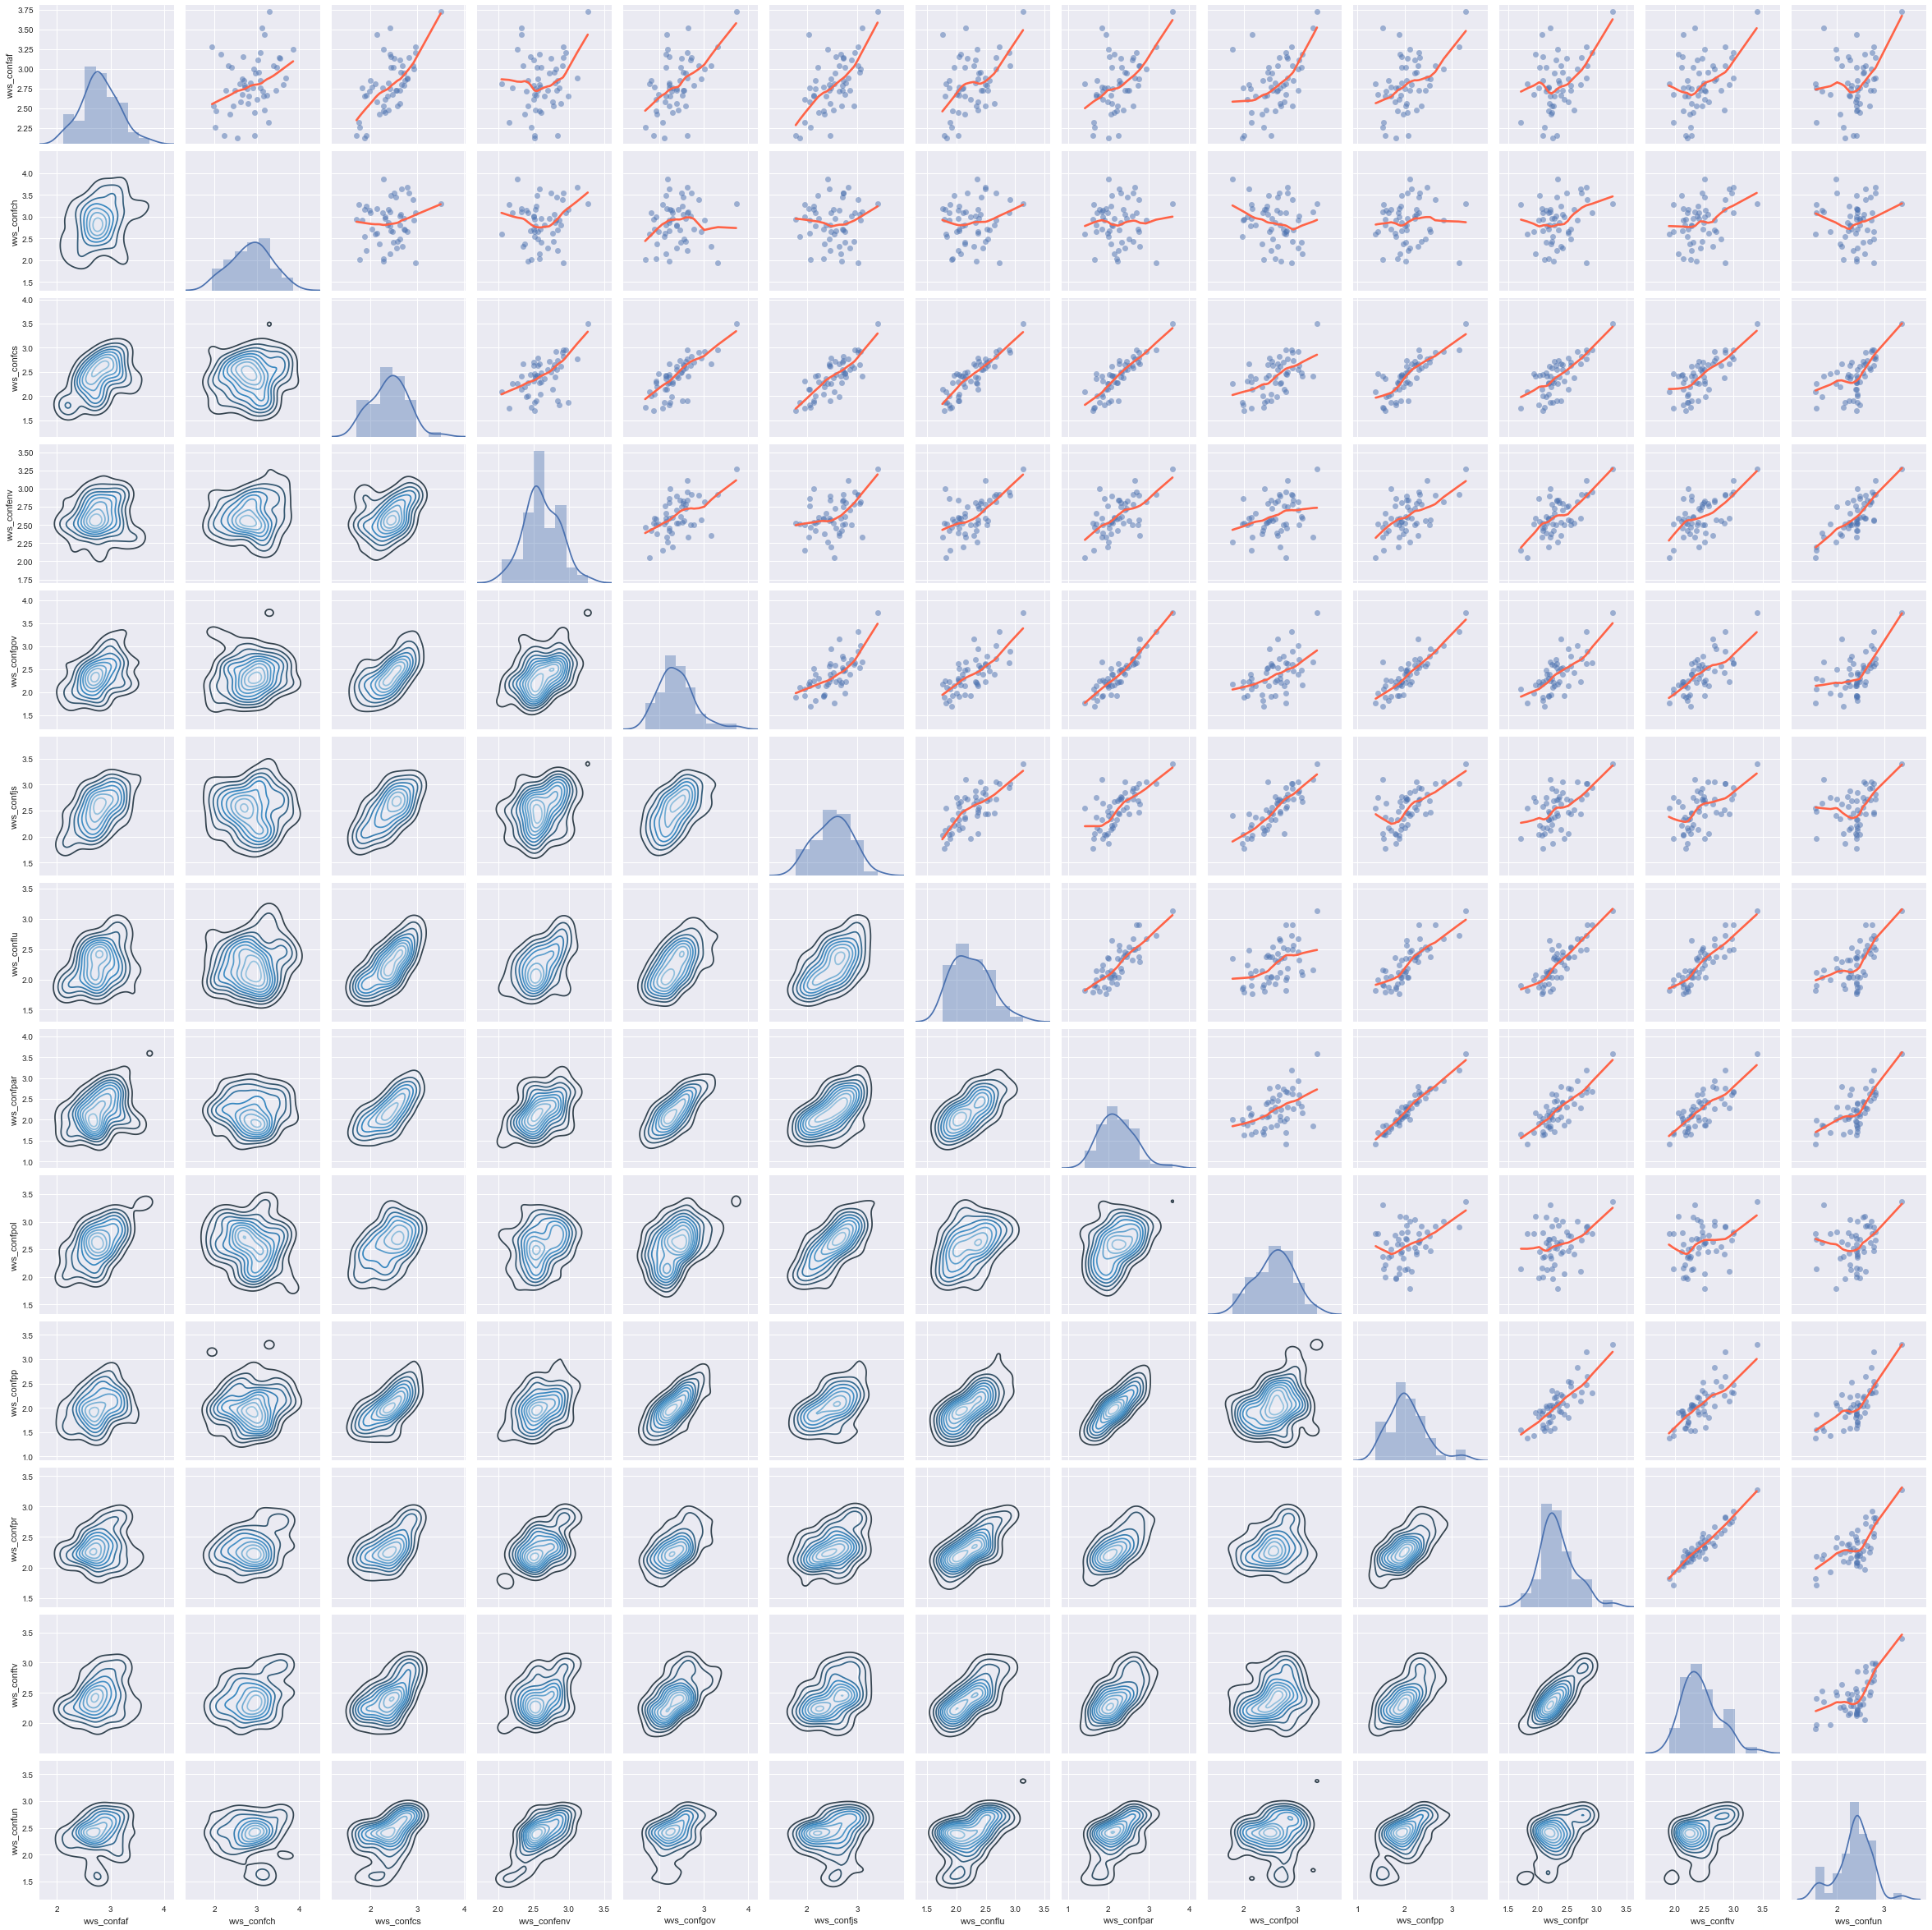

In [28]:
grid = sns.PairGrid(wvs_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_upper(sns.regplot, lowess=True, 
                      scatter_kws = {'alpha': .5},
                     line_kws = {'color': 'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues_d')

## Hipótesis 
- Juicio empiricamente comprobable sobre la relación entre 2 o más variables. 
- Primer paso: Definir enunciados de hipótesis
- Segundo paso: Definir estadísico de prueba
- Tercer paso: Definir una distribución de la hipótesis nula
- Cuarto paso: Definir un puntaje de corte

## Paso 1: Definir Hipótesis

### Hipótesis nula
El nivel de confianza interpersonal no es distinto al criterio propuesto de 0.7 

($H_{o}: \bar{x}_{\textsf{confianza}} = 0.7$).

### Hipotesis alternativa
El nivel de confianza interpersonal es distinto al criterio propuesto de 0.7

($H_{a}: \bar{x}_{\textsf{confianza}} \neq 0.7$).

## Paso 2: Definir estadistico de prueba
- Estadistico de prueba que refleje un punto estimado para nosotros
- Distribución de la nula que refleje el nulo efecto estimado bajo la hipotesis nula
- Puntaje de corte o criterio arbitrario que permita evaluar el estadístico de prueba

Se podría ajustar ese valor muestrar contra el valor poblacional y ajustar por el error estándar 

z = (xm - 0,7) / (raiz(varianza/cantidad de obs))
xm = media de la muestra

In [29]:
trust = df['wvs_trust'].dropna()

In [30]:
diff = trust.mean() - .7

In [31]:
diff

-0.46479472043636355

In [36]:
error_std = np.sqrt(np.var(trust, ddof = 1 )/float(trust.shape[0]))
error_std

0.0219584530263424

In [37]:
diff / error_std

-21.167006613752516

In [43]:
#esta función realiza lo que hicimos arriba 
stats.ttest_1samp(trust, 0.7)

Ttest_1sampResult(statistic=-21.16700661375252, pvalue=8.168825038158067e-28)

## Paso 3: Definir la distribución de la hipótesis nula

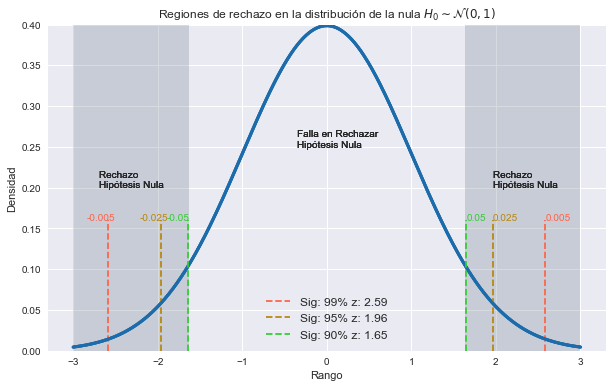

In [45]:
plt.figure(figsize = (10,6))
gfx.graph_significance()

### Distribución T

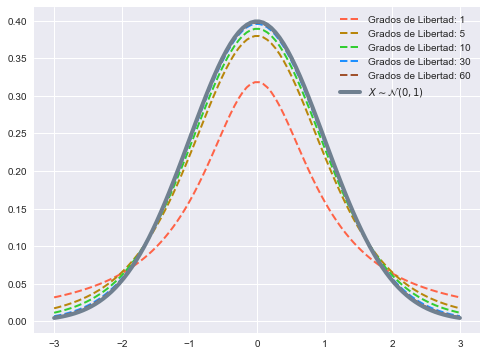

In [46]:
gfx.t_distribution()

####  Comparar medias entre dos grupos -Z t de student

Ho : Xm1 = Xm2

Ha : Xmu1 >< Xmu2

Estimador
    t = [(Xm1-Xm2)-(mu1 - mu2)]/desv * raiz(1/n1 + 1/n2)

In [64]:
df['western_dm'] = np.where(df['region_recod'] == 'WesternDem', 1, 0)

In [66]:
western_trust = df.query('western_dm == 1')['wvs_trust'].dropna()
no_western_trust = df.query('western_dm == 0')['wvs_trust'].dropna()

In [68]:
stats.ttest_ind(western_trust, no_western_trust)

Ttest_indResult(statistic=5.258244235094224, pvalue=2.6582316564048346e-06)